# Chanho Lim and Roland Nguyen

## An Analysis of 

   ### - Android's Google Play Store
   
   ### - IOS's Apple App Store
   
   ### - And a comparison between the two
   
##### Last Updated: 11/28/19

#### Table of Contents:
    1. Introduction
        a. Overview of Data
        b. Motivation
        c. Requirements
    2. Data Munging
        a. Load both datasets
        b. Clean Google Playstore dataset
        c. Clean Apple Playstore dataset
    3. Exploratory Analysis

### Introduction

#### Overview of Data:

Both Apple App Store dataset and Google Play Store dataset are public datasets obtained from Kaggle.
According to the uploaders of these datasets, the Apple App Store dataset was acquired through Apple's ITunes API by the user Ramanathan while the Google Play Store dataset was gleaned through web scraping by Kaggle user Lavanya Gupta.

They feature details describing various applications on their respective application stores. 
These details include important statistics one can draw from like installation counts, overall ratings, pricing, and more.

The Apple App Store dataset was most recently updated on June 10, 2018.

The Google Play Store dataset was most recently updated on February 3, 2019.

#### Motivation:

Our motivation for such an analysis comes from our personal dedication towards our mobile operating system of choice. Both Chanho and Roland prefer Android for their phones however the two have had disputes regarding the quality of apps within Google’s Android ecosystem as opposed to that of Apple’s iOS ecosystem relative to the price one would pay for those apps. For that reason, the two have opted to perform analysis and witness with their own eyes the true victor of this dispute. In the following cells, they will set out to observe comparisons of the two operating systems' datasets on various levels - i.e., by Store, by genre, by price range, by content rating, and even by app to app.

Informing the populace of such knowledge may be able to sway them to the other side when it comes to their next smartphone.

#### Requirements:

[Google Play Store dataset](https://www.kaggle.com/lava18/google-play-store-apps)

[Apple App Store dataset](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)

Pandas

Numpy

Seaborn

Matplotlib

### Data Processing

In [1]:
#import all necessary libraries and read csv files
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
ggplay_df = pd.read_csv("./googleplaystore.csv")
ggplay_user_df = pd.read_csv('./googleplaystore_user_reviews.csv')
apple_df = pd.read_csv('./AppleStore.csv')
apple_desc_df=pd.read_csv('./appleStore_description.csv')

### Clean the column variables from googleplaystore.csv and AppleStore.csv

First, we identified columns that we cannot match against the other (i.e. columns that are not present in the other dataframe). Then we dropped those columns, then we mapped the column variables so that they are easier to identify between both dataframes. 

In [2]:
ggplay_df = ggplay_df.drop(['Reviews','Current Ver', 'Android Ver', 'Last Updated','Size', 'Category'], axis = 1)
ggplay_df = ggplay_df.rename(columns = {'Genres' : 'Genre'})
ggplay_df['Price'] = ggplay_df.Price.map(lambda x: ''.join([i for i in x if i.isdigit() or i=='.']))
ggplay_df.Price = ggplay_df.Price.replace('', np.nan)
ggplay_df.Price = ggplay_df.Price.astype(np.float64)

In [3]:
ggplay_df.Installs = ggplay_df.Installs.replace('Free', '0')
ggplay_df.Installs = ggplay_df.Installs.map(lambda x: ''.join([i for i in x if i.isdigit()]))
ggplay_df = ggplay_df.rename(columns = {'Installs' : 'Installs_plus'})
ggplay_df.Installs_plus.unique()
ggplay_df.Installs_plus = ggplay_df.Installs_plus.astype('int64')

In [4]:
apple_df = apple_df.rename(columns = {'user_rating' : 'Rating','track_name' : 'App', 'ver' : 'Current Ver', 'price' : 'Price', 'prime_genre' : 'Genres', 'size_bytes' : 'Size', 'cont_rating' : 'Content Rating'})
apple_df = apple_df.drop(['rating_count_tot','id', 'Size', 'Unnamed: 0','sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic' , 'currency', 'Current Ver', 'user_rating_ver', 'rating_count_ver'], axis=1)
apple_df['Type'] = np.where(apple_df['Price'] == 0.00, 'Free', 'Paid')
apple_df = apple_df[['App', 'Rating', 'Type', 'Price', 'Content Rating', 'Genres']]

display(ggplay_df)
display(apple_df)

,App,Rating,Installs_plus,Type,Price,Content Rating,Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,3.9,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,4.5,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,4.3,100000,Free,0.0,Everyone,Art & Design;Creativity
5,Paper flowers instructions,4.4,50000,Free,0.0,Everyone,Art & Design
6,Smoke Effect Photo Maker - Smoke Editor,3.8,50000,Free,0.0,Everyone,Art & Design
7,Infinite Painter,4.1,1000000,Free,0.0,Everyone,Art & Design
8,Garden Coloring Book,4.4,1000000,Free,0.0,Everyone,Art & Design
9,Kids Paint Free - Drawing Fun,4.7,10000,Free,0.0,Everyone,Art & Design;Creativity


,App,Rating,Type,Price,Content Rating,Genres
0,PAC-MAN Premium,4.0,Paid,3.99,4+,Games
1,Evernote - stay organized,4.0,Free,0.00,4+,Productivity
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",3.5,Free,0.00,4+,Weather
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",4.0,Free,0.00,12+,Shopping
4,Bible,4.5,Free,0.00,4+,Reference
5,Shanghai Mahjong,4.0,Paid,0.99,4+,Games
6,PayPal - Send and request money safely,4.0,Free,0.00,4+,Finance
7,Pandora - Music & Radio,4.0,Free,0.00,12+,Music
8,PCalc - The Best Calculator,4.5,Paid,9.99,4+,Utilities
9,Ms. PAC-MAN,4.0,Paid,3.99,4+,Games


### Exploratory Analysis and Data Visualization

As avid gamers, (though never mobile gamers) we've wondered to ourselves was, "What is the distribution of the video game genre between the two app stores?"

In order to solve this question, we've opted to create a piechart for each dataframe, representing the portion of each genre by counting the values of each genre, then displaying the top 15 and the rest as etc. As shown below, we can see that games take up a huge portion of apple store dataset, whereas Google Playstore does not even contain games in the top 15. 

Text(0.5, 1.0, 'Google Play Store Genre Distribution')

<Figure size 1440x1440 with 0 Axes>

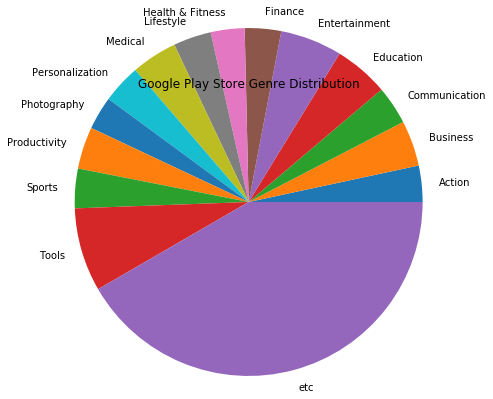

In [5]:
plt.figure(figsize = (20,20))
biggroups = ggplay_df.Genre.value_counts().index[:14]
def categorize(x):
    if x in biggroups: return x
    else: return "etc"
ggplay_df['Category'] = ggplay_df.Genre.apply(lambda x: categorize(x))
genres = ggplay_df.Category.value_counts().sort_index().index
size = ggplay_df.Category.value_counts().sort_index().tolist()
fig, ax = plt.subplots()
piechart = ax.pie(size, radius = 2, labels=genres)
plt.title('Google Play Store Genre Distribution')

Text(0.5, 1.0, 'App Store Genre Distribution')

<Figure size 1440x1440 with 0 Axes>

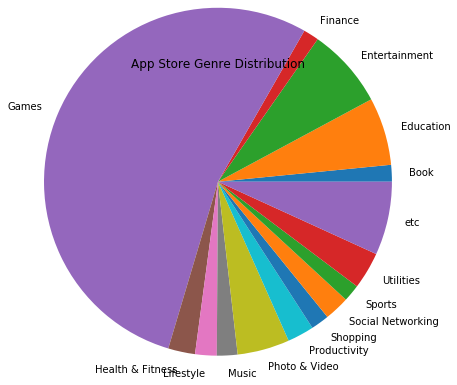

In [6]:
plt.figure(figsize = (20,20))
biggroups = apple_df.Genres.value_counts().index[:14]
def categorize(x):
    if x in biggroups: return x
    else: return "etc"
apple_df['Category'] = apple_df.Genres.apply(lambda x: categorize(x))
genres = apple_df.Category.value_counts().sort_index().index
size = apple_df.Category.value_counts().sort_index().tolist()
fig, ax = plt.subplots()
piechart = ax.pie(size, radius = 2, labels=genres)
plt.title('App Store Genre Distribution')

Looking at the two pie charts, we notice just how big the games genre is in the Apple App Store. Naturally, we were curious how the games genre size would stack up in the Google Play Store.

Here, we encounter a major problem. The games genre is split up into muliple subgenres, as in the genre of game. 
So below we will have to do some work on binning those subgenres into a genre representing games overall.

To do so, we have created a function that, if it's genre is one of the 120 original genres we have deemed to be considered games, it will relabel it to such a category.

We will then apply that function to the entire row of Genre.

In [7]:
def relabel_genres (row):
    if row['Genre'] in ['Art & Design;Action & Adventure',
                       'Education;Action & Adventure','Education;Pretend Play',
                       'Education;Brain Games','Entertainment;Brain Games','Adventure;Action & Adventure',
                       'Arcade', 'Casual', 'Card',
                       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
                       'Word', 'Racing', 'Casual;Creativity',
                       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
                       'Trivia', 'Role Playing', 'Simulation;Education',
                       'Action;Action & Adventure', 'Casual;Brain Games',
                       'Simulation;Action & Adventure', 'Educational;Creativity',
                       'Puzzle;Brain Games', 'Educational;Education', 'Card;Brain Games',
                       'Educational;Brain Games', 'Educational;Pretend Play',
                       'Entertainment;Education', 'Casual;Education',
                       'Music;Music & Video', 'Racing;Action & Adventure',
                       'Arcade;Pretend Play', 'Role Playing;Action & Adventure',
                       'Simulation;Pretend Play', 'Puzzle;Creativity',
                       'Sports;Action & Adventure', 'Educational;Action & Adventure',
                       'Arcade;Action & Adventure', 'Entertainment;Action & Adventure',
                       'Puzzle;Action & Adventure', 'Strategy;Action & Adventure',
                       'Adventure;Education', 'Board;Brain Games',
                       'Board;Action & Adventure', 'Board;Pretend Play',
                       'Casual;Music & Video', 'Role Playing;Pretend Play',
                       'Entertainment;Pretend Play', 'Video Players & Editors;Creativity',
                       'Card;Action & Adventure']: return 'Games'
    else:
        return row['Genre']
    
ggplay_df['Genre'] = ggplay_df.apply(lambda row: relabel_genres(row), axis=1)

Now we can once again create the pie chart for Google Play showing the distribution of genres the same way as the two above pie graphs.

Text(0.5, 1.0, 'Google Play Store Genre Distribution')

<Figure size 1440x1440 with 0 Axes>

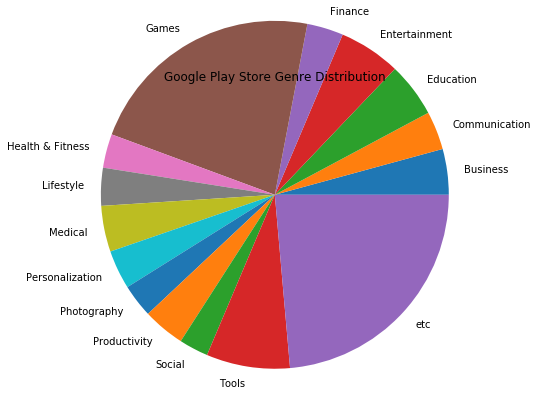

In [8]:
plt.figure(figsize = (20,20))
biggroups = ggplay_df.Genre.value_counts().index[:14]
def categorize(x):
    if x in biggroups: return x
    else: return "etc"
ggplay_df['Category'] = ggplay_df.Genre.apply(lambda x: categorize(x))
genres = ggplay_df.Category.value_counts().sort_index().index
size = ggplay_df.Category.value_counts().sort_index().tolist()
fig, ax = plt.subplots()
piechart = ax.pie(size, radius = 2, labels=genres)
plt.title('Google Play Store Genre Distribution')

From this pie chart, we can better see how much of the distribution of genres is games.
As expected, this is a large chunk, however, one might notice that this pales in compairson to the portion that the genre took up in the Apple App Store dataset.

A conclusion on this data can be construed in many ways, so instead of telling the reader what this means, we will leave a  possible interpretation and leave it up to the reader to decide on one.

One could argue that the Play Store's lower barrier of entry allows for smaller developers to more easier to upload anything they want. Google Play simply requires a developer registration fee of \\$25 and doesn't check published apps before posting them. They deal with malicious apps once there have been many reports. Apple on the other hand has an annual \\$99 Apple Developer fee to publish apps. Furthermore, Apple tends to review each and every app before releasing it. Knowing this, the natural conclusion is that the App Store MUST have higher quality apps then. We shall explore this later on in the notebook.

[Here is an article about the obstacles to publish on each storefront](https://www.cleverism.com/where-to-publish-mobile-apps-android-vs-ios/)


But such a line of thinking is a dangerous mindset as the truth is far more multi-faceted. One could just as easily  argue that Apple simply has a possibly younger audience who can then play more games leading developers to make what appeals to the audience and sells. There has been a rise in freemium games in the past decade or so afterall.
This too is something that we shall explore later on in the notebook.

----------------------------------------------------------------------------------------------------------------------

Going off of the aforementioned claim one might often encounter on the internet, we then wondered -  "Which store has higher average ratings overall?" giving way to the question "How do apps score overall in each store?"


So below we have used a countplot to represent the distribution of the app ratings for each dataframe.

The first of which shows for the AppStore. The AppStore ratings distribution is binned into intervals of 0.5,
but the Google Play ratings are the true values of the apps at the time of data gathering rather than binned values.

As there is no way for us to get the true values from the binned values (without rescraping new data), our only choice is to also bin the Google Play ratings in order to fully grasp the comparison between the two.

We see that in the both datasets, there is a high concentration of apps with ratings around 4.5.
Furthermore, we also see that: Google Play Store has very few apps below 2 stars, and the App Store has a decent sized population under 1 star.

The Apple App store has a mean rating of 3.526955675976101


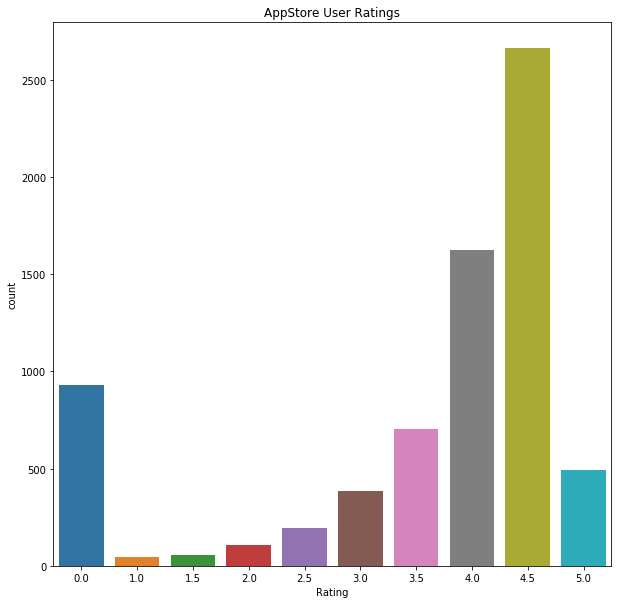

In [9]:
print("The Apple App store has a mean rating of", apple_df['Rating'].mean())
plt.figure(figsize = (10,10))
plt.title('AppStore User Ratings')
sns.countplot(x='Rating', data = apple_df)

The Google Play store has a mean true rating of 4.193338315362448
The Google Play store has a mean binned rating of 4.38404868673927


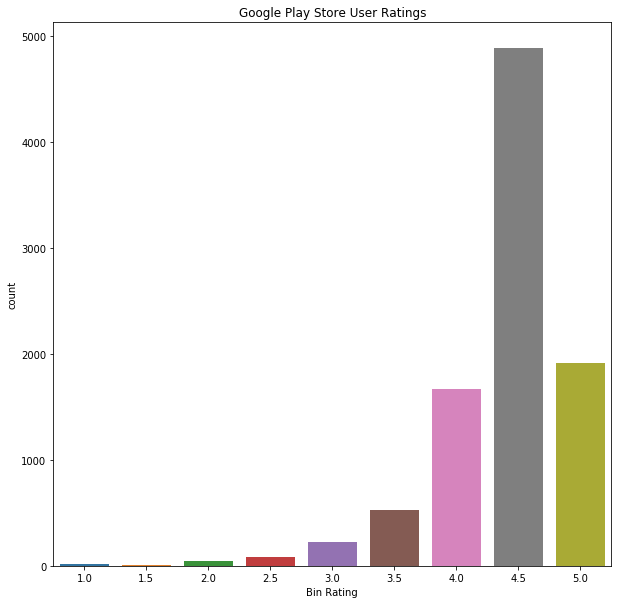

In [10]:
rating_bins = [0.0, 1.0, 1.5, 2.0, 2.5,3.0, 3.5, 4.0, 4.5, 5.0]
labels = [1.0, 1.5, 2.0, 2.5,3.0, 3.5, 4.0, 4.5, 5.0]
ggplay_df['Bin Rating'] = pd.cut(ggplay_df['Rating'], bins = rating_bins, labels = labels).astype('float64')
print("The Google Play store has a mean true rating of", ggplay_df['Rating'].mean())
print("The Google Play store has a mean binned rating of", ggplay_df['Bin Rating'].mean())

plt.figure(figsize = (10,10))
plt.title('Google Play Store User Ratings')
sns.countplot(x='Bin Rating', data = ggplay_df)

Going by the two bar graphs and their respective average ratings, we'd have to give a point to the Play Store here.
As consumers against big corporate though, we need to be educated and not take this at face value as there could be many possible reasons for this that aren't initially clear.

For one, a simple count plot by ratings in no way takes into account the number of ratings for a specific app. So we could have a situation where an app with 2 ratings is sitting at 5 stars which would be ranked higher than an app wih 4.5 stars with 50,000 ratings. This is clearly an issue since with only 2 ratings, we cannot yet determine the actual quality of the application. Those two reviews could easily be the developer and his friend.

Secondly, "review bombing" is another issue that totally exists. On both sides of you might have situations where a community artifically boosts or lowers a apps rating. 

----------------------------------------------------------------------------------------------------------------------

Returning to the initial analysis' possible interpretation leading to the line of thought that Apple IOS has a younger userbase than Android, we wondered if that was actually true. But we obviously cannot look directly into this as we would need to sample from a large enough population of users representative of the true population and ask them what mobile operating system they use and how old they are. So a more feasible option we saw was to hopefully extrapolate some information about that by looking at their respective Content Rating distribution.

In [12]:
def relabel_content (row):
    if row['Content Rating'] in ['4+'] : return "Everyone"
    if row['Content Rating'] in ['12+'] : return "Teen"
    if row['Content Rating'] in ['9+'] : return "Everyone+"
    if row['Content Rating'] in ['17+'] : return "Mature"
    if row['Content Rating'] in ['Everyone 10+'] : return "Everyone+"
    else:
        return row['Content Rating']

ggplay_df['Content Rating'] = ggplay_df.apply(lambda row: relabel_content(row), axis=1)    
apple_df['Content Rating'] = apple_df.apply(lambda row: relabel_content(row), axis=1)

In [13]:
ggplay_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone+', 'Mature 17+', 'Adults only 18+',
       'Unrated', nan], dtype=object)

In [14]:
apple_df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Mature', 'Everyone+'], dtype=object)